In [2]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV, KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

import numpy as np
import warnings
warnings.filterwarnings("ignore")

### We have used pickle file here instead of csv because, we changed data types of some variables in part 1 of the project and since data is stored in text format in csv file, it can't store data types. So, we decided to use pickle file of our data to get appropriate data type of variables 

In [2]:
df = pd.read_pickle('Group_1_data_cleaned.pkl')
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
1,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
2,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
3,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,1
4,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,1
5,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274650 entries, 1 to 311028
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   duration                     274650 non-null  int64   
 1   protocol_type                274650 non-null  category
 2   service                      274650 non-null  category
 3   flag                         274650 non-null  category
 4   src_bytes                    274650 non-null  int64   
 5   dst_bytes                    274650 non-null  int64   
 6   land                         274650 non-null  category
 7   wrong_fragment               274650 non-null  category
 8   urgent                       274650 non-null  category
 9   hot                          274650 non-null  float64 
 10  num_failed_logins            274650 non-null  float64 
 11  logged_in                    274650 non-null  category
 12  num_compromised              274650 non-null

In [4]:
df.describe()

,duration,src_bytes,dst_bytes,hot,num_failed_logins,num_compromised,num_root,num_file_creations,count,srv_count,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,274650.000000,274650.000000,274650.000000,274650.0,274650.0,274650.0,274650.0,274650.0,274650.000000,274650.000000,...,274650.000000,274650.000000,274650.000000,274650.000000,274650.000000,274650.000000,274650.000000,274650.0,274650.000000,274650.000000
mean,0.871203,919.961901,508.967872,0.0,0.0,0.0,0.0,0.0,290.296414,265.696439,...,238.333712,215.296974,0.852442,0.011169,0.610619,0.002539,0.000060,0.0,0.146527,0.145991
std,22.115003,8706.612722,2507.296883,0.0,0.0,0.0,0.0,0.0,221.024118,238.907307,...,56.253692,88.310265,0.340995,0.022759,0.482677,0.009912,0.001129,0.0,0.352124,0.352827
min,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,105.000000,0.000000,0.0,0.0,0.0,0.0,0.0,37.000000,10.000000,...,255.000000,254.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,0.000000,520.000000,0.000000,0.0,0.0,0.0,0.0,0.0,268.000000,158.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,0.000000,1032.000000,0.000000,0.0,0.0,0.0,0.0,0.0,511.000000,511.000000,...,255.000000,255.000000,1.000000,0.010000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000
max,1181.000000,283618.000000,48451.000000,0.0,0.0,0.0,0.0,0.0,511.000000,511.000000,...,255.000000,255.000000,1.000000,0.130000,1.000000,0.100000,0.040000,0.0,1.000000,1.000000


In [5]:
# converting categorical variable into dummies

df = pd.get_dummies(df,columns=['protocol_type','service','flag','land','wrong_fragment','urgent','logged_in','root_shell',
                                'su_attempted','num_shells','num_access_files','num_outbound_cmds','is_host_login',
                                'is_guest_login'])

In [6]:
df.head()

,duration,src_bytes,dst_bytes,hot,num_failed_logins,num_compromised,num_root,num_file_creations,count,srv_count,...,num_access_files_0.0,num_access_files_1.0,num_access_files_2.0,num_access_files_3.0,num_access_files_4.0,num_outbound_cmds_0.0,is_host_login_0.0,is_host_login_1.0,is_guest_login_0.0,is_guest_login_1.0
1,0,105,146,0.0,0.0,0.0,0.0,0.0,1,1.0,...,1,0,0,0,0,1,1,0,1,0
2,0,105,146,0.0,0.0,0.0,0.0,0.0,1,1.0,...,1,0,0,0,0,1,1,0,1,0
3,0,105,146,0.0,0.0,0.0,0.0,0.0,2,2.0,...,1,0,0,0,0,1,1,0,1,0
4,0,105,146,0.0,0.0,0.0,0.0,0.0,2,2.0,...,1,0,0,0,0,1,1,0,1,0
5,0,105,146,0.0,0.0,0.0,0.0,0.0,2,2.0,...,1,0,0,0,0,1,1,0,1,0


In [7]:
# defining target variable

X = df.iloc[0:].drop('label',axis=1)
y = df[['label']]

## Comparison of four different models

In [8]:
#splitting the data into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

### 1) Modeling without hyperparameter tuning

In [9]:
# base models

models = []
models.append(('Linear Classification', RidgeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Dec_tree', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC-NonLinear', SVC(kernel='rbf')))
models.append(('Multi Layer Perceptron', MLPClassifier()))


In [13]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV, KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [17]:
results = []
names = []
scoring = 'accuracy'
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

for name, model in models:
    kfold = KFold(n_splits=5, random_state=None)
    cv_results =cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    

Linear Classification: 0.959328 (0.001006)
Random Forest: 0.978591 (0.000449)
Dec_tree: 0.978484 (0.000366)
KNN: 0.976625 (0.000369)
SVC-NonLinear: 0.935918 (0.005508)
Multi Layer Perceptron: 0.972804 (0.001158)


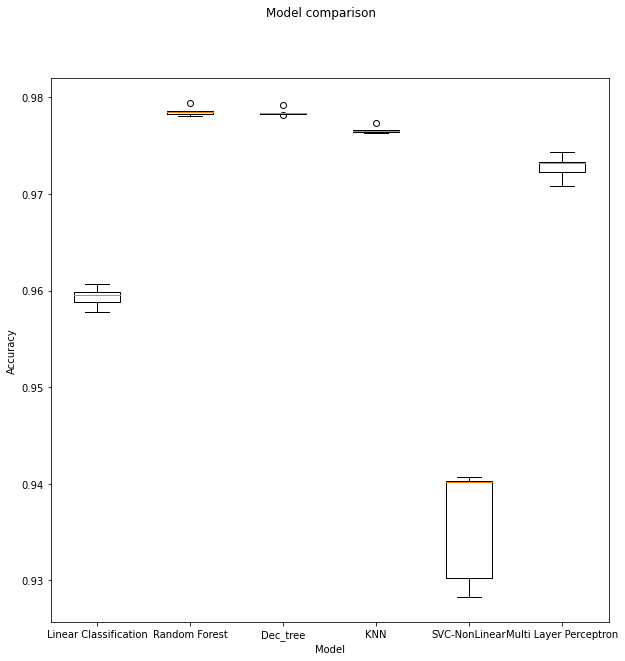

In [28]:
# comparing the results of all models
fig = plt.figure()
plt.rcParams["figure.figsize"] = [5, 5]
fig.suptitle('Model comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()

### 2) Training model with best hyperparameters found from GridSearchCV 

### a) Linear classifier trained with best hyperparameters (Ridge Classifier)

In [29]:
#defining the model with best hyperparameters found from gridserachCV

gslrc_best = RidgeClassifier(max_iter = 1, 
                           alpha = 0.1,
                           solver = 'auto')

gslrc_best.fit(X_train, y_train)
# Predicting target variable

gslrc_pred = gslrc_best.predict(X_test)

In [30]:
# Print classification report 

print(classification_report(y_test, gslrc_pred))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90     13012
           1       1.00      0.95      0.97     55651

    accuracy                           0.96     68663
   macro avg       0.91      0.97      0.94     68663
weighted avg       0.96      0.96      0.96     68663



In [31]:
print('Accuracy: {:.4f}'.format(accuracy_score(y_test, gslrc_pred)))

Accuracy: 0.9592


### b) Model trained with Random forest and best hyperparameters

In [32]:
#defining the model with best hyperparameters found from gridserachCV

forest = RandomForestClassifier(max_depth = 70, max_features = 'sqrt', n_estimators= 30)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=70, n_estimators=30)

In [33]:
#predicitng 
y_pred = forest.predict(X_test)
y_pred

#classificaiton report for target variable
print(classification_report(y_test, y_pred))

#accuracy of the model
accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     13012
           1       0.99      0.99      0.99     55651

    accuracy                           0.98     68663
   macro avg       0.97      0.97      0.97     68663
weighted avg       0.98      0.98      0.98     68663



0.9792755923860011

In [34]:
print('Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.9793


### c) Model trained with Decision tree and best hyperparameters

In [35]:
#taking best parameters for classification tree

from sklearn import tree

hyperparameter_tuned_model= tree.DecisionTreeClassifier(max_depth=10,min_samples_split = 2,
                                                       criterion='gini')

hyperparameter_tuned_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [36]:
#prediction
y_tuned_pred = hyperparameter_tuned_model.predict(X_test)

In [37]:
#print classification report
print(classification_report(y_test, y_tuned_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94     13012
           1       0.99      0.99      0.99     55651

    accuracy                           0.98     68663
   macro avg       0.97      0.96      0.97     68663
weighted avg       0.98      0.98      0.98     68663



In [38]:
print('Accuracy: {:.4f}'.format(accuracy_score(y_test, y_tuned_pred)))

Accuracy: 0.9789


### d) Model trained with KNN and best hyperparameters

In [39]:
#taking best parameters for KNN

knn_best = KNeighborsClassifier(n_neighbors= 32, weights= 'distance')

In [40]:
knn_best.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=32, weights='distance')

In [41]:
y_pred = knn_best.predict(X_test)

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     13012
           1       0.99      0.99      0.99     55651

    accuracy                           0.98     68663
   macro avg       0.96      0.96      0.96     68663
weighted avg       0.98      0.98      0.98     68663



In [43]:
print('Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.9782


### e) Modelling using Support Vector Classifier - Non-Linear Kernel and Best Hyperparameter

In [10]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',
                 C = 100, 
                 gamma = 0.1)
classifier.fit(X_train, y_train)

SVC(C=100, gamma=0.1)

In [11]:
y_pred = classifier.predict(X_test)

In [12]:
#print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92     13089
           1       0.99      0.96      0.98     55574

    accuracy                           0.97     68663
   macro avg       0.93      0.97      0.95     68663
weighted avg       0.97      0.97      0.97     68663



In [13]:
print('Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.9655


### f) Modelling using Deep Learning - Multi Layer Perceptron and Best Hyperparameter

In [15]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(activation= 'relu', 
                    hidden_layer_sizes= 10, 
                    learning_rate= 'constant', 
                    solver= 'adam')
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=10)

In [16]:
y_pred = mlp.predict(X_test)

In [17]:
#print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91     13089
           1       0.99      0.96      0.98     55574

    accuracy                           0.96     68663
   macro avg       0.93      0.97      0.95     68663
weighted avg       0.97      0.96      0.97     68663



In [18]:
print('Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.9650


### Now we'll choose random forest model for training after using feature selection methods, as it is the best model for given data with 97.93% accuracy

### Variable Selection using LassoCV Method and Best Hyperparameter tunning.

Good alpha value using LassoCV: 0.570629
Good score value using LassoCV: 0.585487
Feature selected by Lasso is 5 variables and dropped 36 variables


Text(0.5, 1.0, 'Feature importance with Lasso Model')

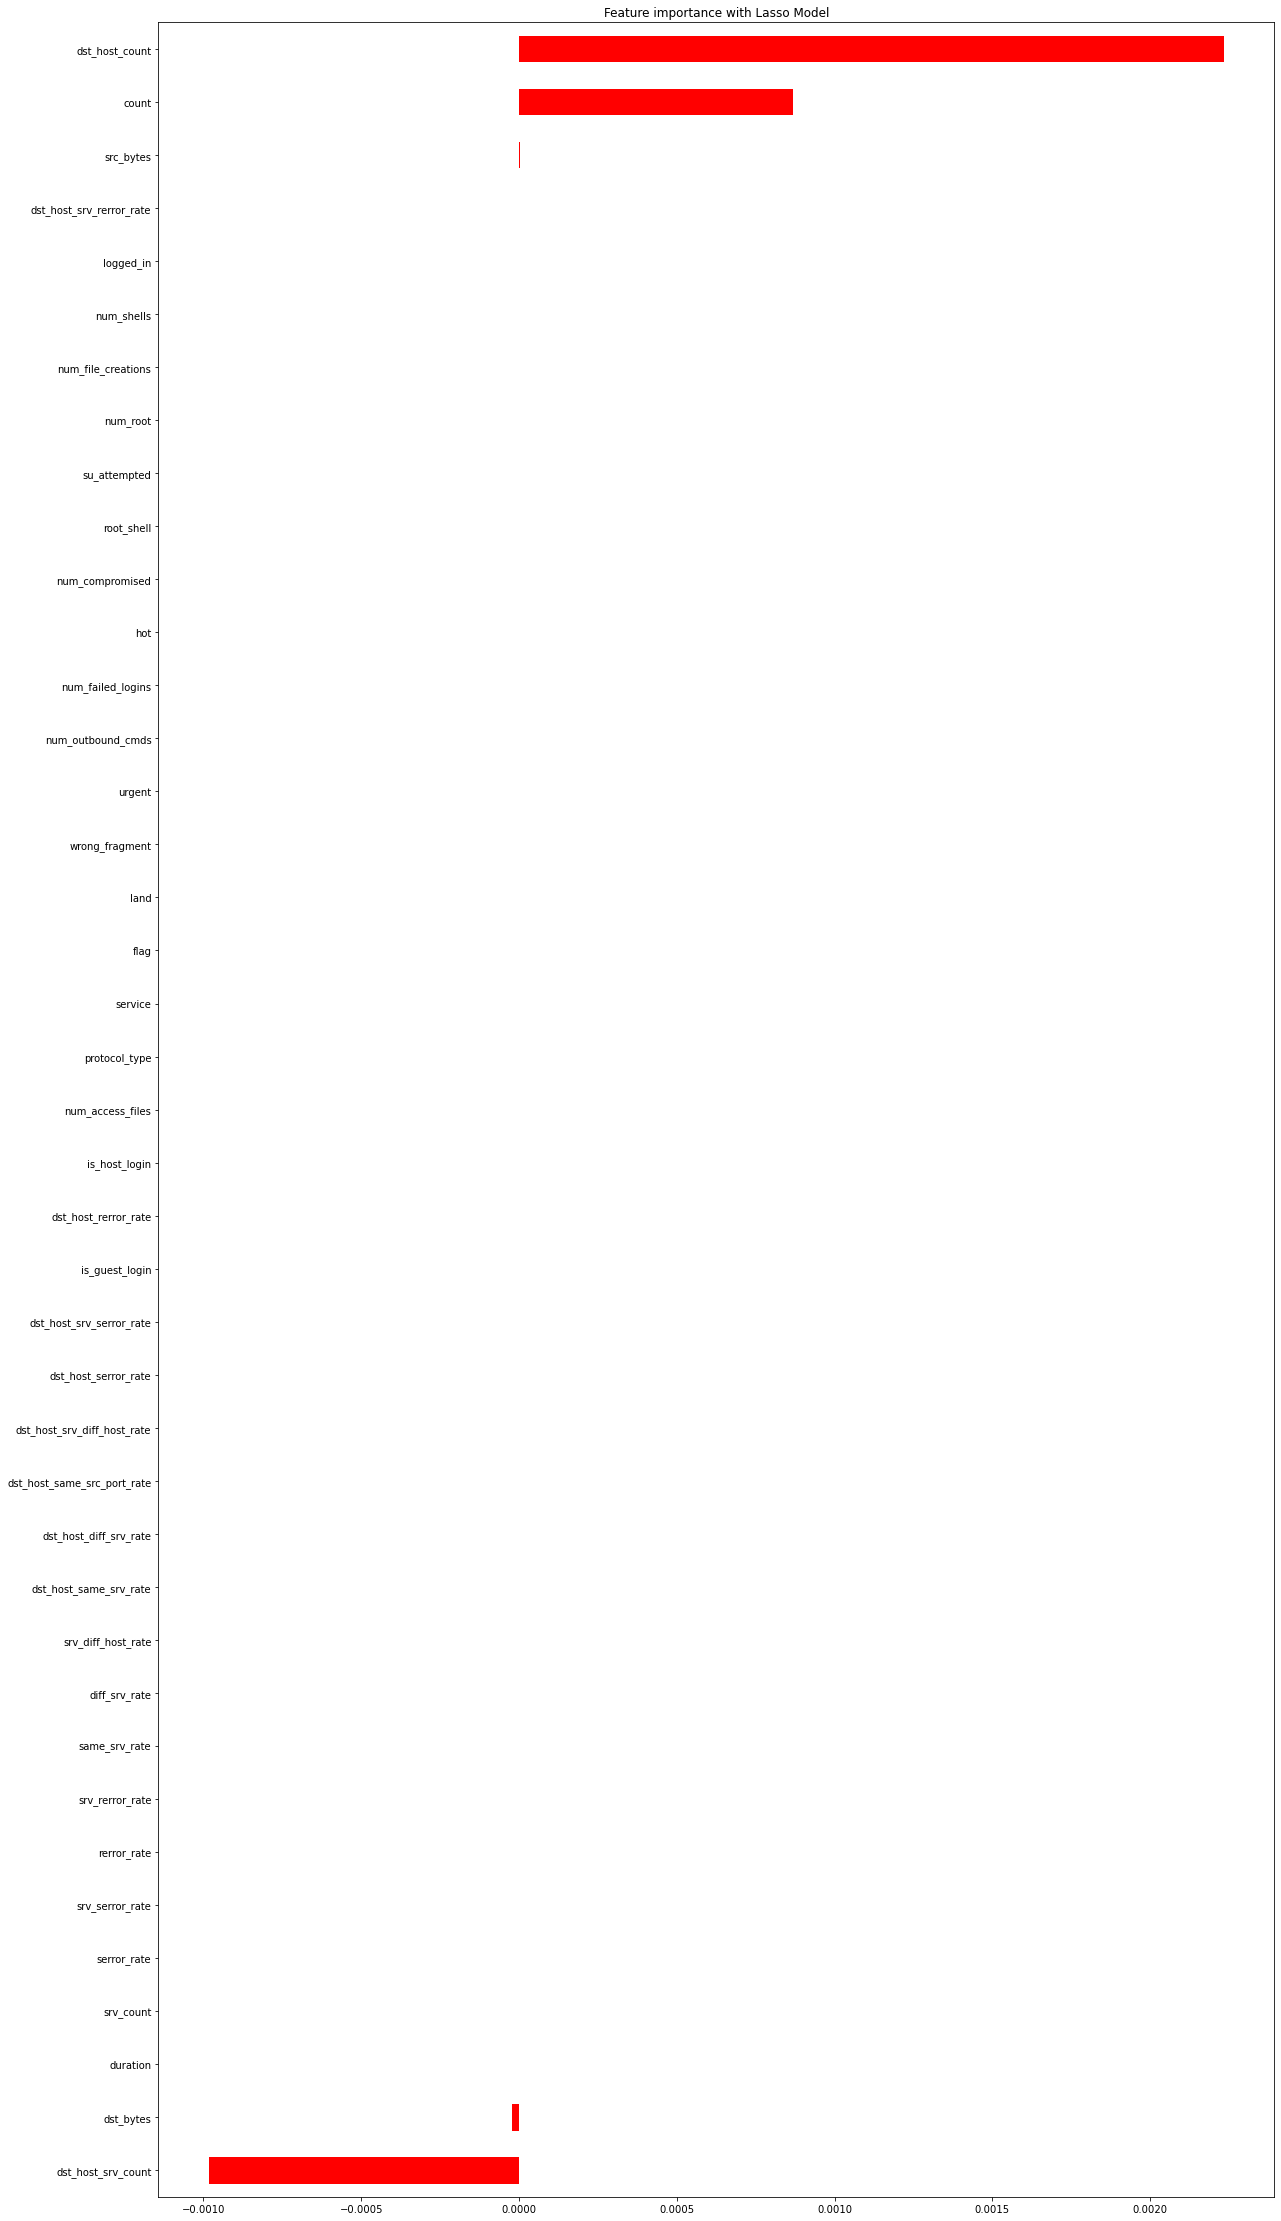

In [25]:
data = pd.read_pickle('Group_1_data_cleaned.pkl')

columns = ['protocol_type','service','flag','land','wrong_fragment','urgent','logged_in','root_shell',
                                'su_attempted','num_shells','num_access_files','num_outbound_cmds','is_host_login',
                                'is_guest_login']

for i in columns:
    data[i] = LabelEncoder().fit_transform(data[i])
    
# defining target variable

X = data.iloc[0:].drop('label',axis=1)
y = data[['label']]

from sklearn.linear_model import LassoCV, Lasso
from sklearn.feature_selection import RFE
import matplotlib

# Feature selection using LassoCv
reg = LassoCV()

reg.fit(X, y)

print("Good alpha value using LassoCV: %f" % reg.alpha_)
print("Good score value using LassoCV: %f" %reg.score(X,y))

coef = pd.Series(reg.coef_, index = X.columns)

print("Feature selected by Lasso is " + str(sum(coef != 0)) + " variables and dropped " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()

matplotlib.rcParams['figure.figsize'] = (20, 40)

imp_coef.plot(kind = "barh", color="red")

plt.title("Feature importance with Lasso Model")


In [27]:
X = df[['dst_host_count','count','src_bytes','dst_host_srv_count']]
y= df[['label']]
#splitting the data into train-test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [28]:
forest = RandomForestClassifier(max_depth = 10, 
                                max_features = 'log2', 
                                n_estimators= 150)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='log2', n_estimators=150)

In [29]:
y_pred = forest.predict(X_test)

In [30]:
#print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93     12837
           1       1.00      0.97      0.98     55826

    accuracy                           0.97     68663
   macro avg       0.94      0.98      0.96     68663
weighted avg       0.97      0.97      0.97     68663



In [31]:
print('Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.9715


### Variable Selection using Bidirectional Elimination Method and Best Hyperparameter tunning.

In [3]:
data = pd.read_pickle('Group_1_data_cleaned.pkl')

columns = ['protocol_type','service','flag','land','wrong_fragment','urgent','logged_in','root_shell',
                                'su_attempted','num_shells','num_access_files','num_outbound_cmds','is_host_login',
                                'is_guest_login']

for i in columns:
    data[i] = LabelEncoder().fit_transform(data[i])
    
# defining target variable

X1 = data.iloc[0:].drop('label',axis=1)
y1 = data[['label']]

### Best features that we got from this method are 
'duration',
 'src_bytes',
 'dst_bytes',
 'srv_count',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_src_port_rate'

In [5]:
X = data[['duration',
 'src_bytes',
 'dst_bytes',
 'srv_count',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_src_port_rate']]
y= data[['label']]

In [6]:
#splitting the data into train-test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [7]:
forest = RandomForestClassifier(max_depth = 90, max_features = 'log2', n_estimators= 30)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=90, max_features='log2', n_estimators=30)

In [8]:
#prediction
y_pred = forest.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [9]:
print('Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.9783


In [10]:
#classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.94      0.94     13083
           1       0.99      0.99      0.99     55580

    accuracy                           0.98     68663
   macro avg       0.97      0.96      0.96     68663
weighted avg       0.98      0.98      0.98     68663

